## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
#Reading the Dataset
df=pd.read_csv('data.csv')

In [3]:
#Make DataFrame to display entire ROWS & COlUMNS
pd.set_option("display.max_column",None)
pd.set_option("display.max_row",None)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
#Selecting the best features
df1=df[["radius_mean",'texture_mean','perimeter_mean','area_mean','smoothness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',"diagnosis"]]


In [6]:
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.1980,0.10430,0.1809,0.05883,M


## Preprocessing


In [7]:
#Converting the Character Containing feature to numerics

scaler=LabelEncoder()
df1['diagnosis']=scaler.fit_transform(df1['diagnosis'])


C:\Users\intel 3\AppData\Local\Temp\ipykernel_6076\2163099665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diagnosis']=scaler.fit_transform(df1['diagnosis'])


In [8]:
#Scaling the DataFrame
scaler=StandardScaler()
df1.iloc[:,:-1]=scaler.fit_transform(df1.iloc[:,:-1])

C:\Users\intel 3\AppData\Local\Temp\ipykernel_6076\3755159172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,:-1]=scaler.fit_transform(df1.iloc[:,:-1])


In [9]:
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,2.652874,2.532475,2.217515,2.255747,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.023846,0.548144,0.001392,-0.868652,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.363478,2.037231,0.939685,-0.398008,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,1.915897,1.451707,2.867383,4.910919,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,1.371011,1.428493,-0.009560,-0.562450,1


## Data Visualization

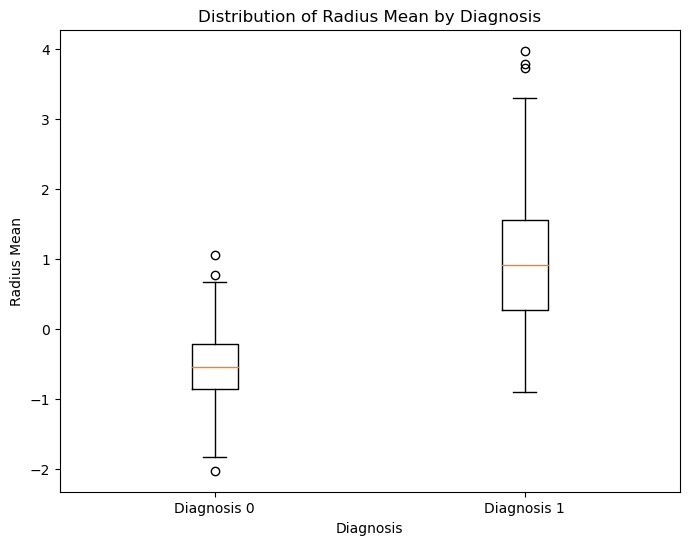

In [10]:
#Boxplot Between Target values and Radius Mean
plt.figure(figsize=(8, 6))
plt.boxplot([df1[df1['diagnosis'] == 0]['radius_mean'], df1[df1['diagnosis'] == 1]['radius_mean']], labels=['Diagnosis 0', 'Diagnosis 1'])

plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
_ = plt.title('Distribution of Radius Mean by Diagnosis')

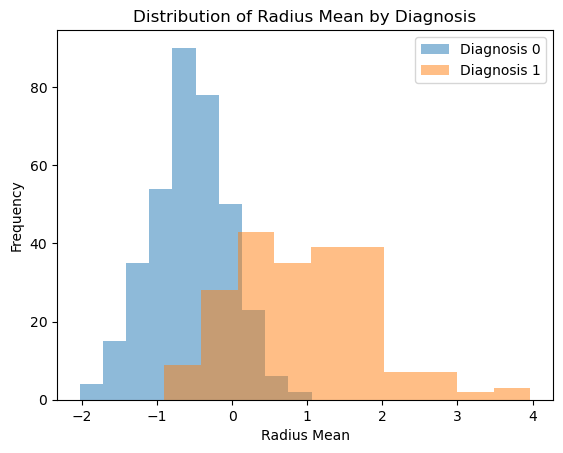

In [11]:
#Histogram plot between Target Values and Radius Mean
plt.hist(df1[df1['diagnosis'] == 0]['radius_mean'], alpha=0.5, label='Diagnosis 0')
plt.hist(df1[df1['diagnosis'] == 1]['radius_mean'], alpha=0.5, label='Diagnosis 1')


plt.title('Distribution of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')


_ = plt.legend()

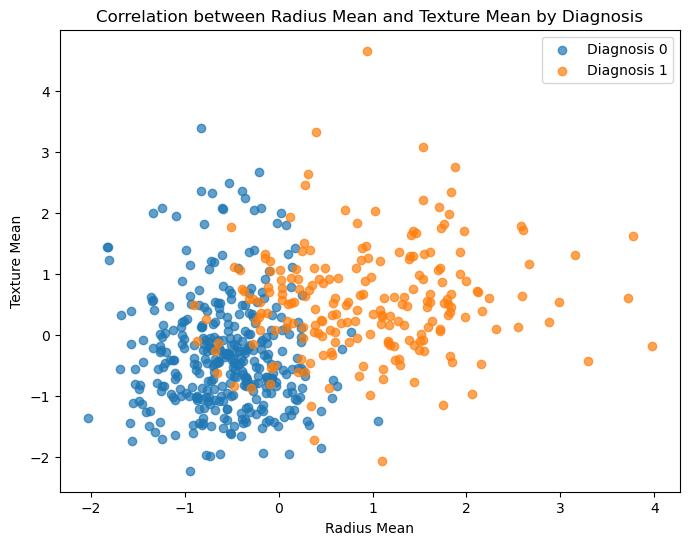

In [12]:
#Scatter Plot Between Texture Mean and Radius Mean
plt.figure(figsize=(8, 6))
plt.scatter(df1[df1['diagnosis'] == 0]['radius_mean'], df1[df1['diagnosis'] == 0]['texture_mean'], label='Diagnosis 0', alpha=0.7)
plt.scatter(df1[df1['diagnosis'] == 1]['radius_mean'], df1[df1['diagnosis'] == 1]['texture_mean'], label='Diagnosis 1', alpha=0.7)


plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Correlation between Radius Mean and Texture Mean by Diagnosis')
_ = plt.legend()

In [13]:
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,2.652874,2.532475,2.217515,2.255747,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.023846,0.548144,0.001392,-0.868652,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.363478,2.037231,0.939685,-0.398008,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,1.915897,1.451707,2.867383,4.910919,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,1.371011,1.428493,-0.009560,-0.562450,1


In [14]:
#Data splitting into Input Values and Target Values
X= df1.iloc[:,:-1]    #Input Features
y=df1.iloc[:,-1]     #Target Feature

In [15]:
#Splitting the data into Training and Testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

In [16]:
model=SVC()  #Support Vector Classifier Model

parameters={
    'C':[0.1,1,10],
    'kernel':['linear','rbf'],
    'gamma':['scale','auto']
}

# GridSearch Based model to select best parameters 

grid_mod=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
#fitting the model
grid_mod.fit(X_train,y_train)
#printing the best parameters from the GridSearchCV
grid_mod.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [19]:
#predicting the output using the above model
prediction=grid_mod.predict(X_test)

In [20]:
#finding the accuracy of the model
accuracy_score(y_test,prediction)*100


98.24561403508771

In [22]:
#Finding F1 Score
f1_score(y_test,prediction)*100

97.61904761904762

## Saving the model in pickle file 

In [23]:
import pickle
pickle.dump(grid_mod,open('SVM_model1.pkl','wb'))